In [ ]:
!unzip -o /content/animal_dataset.zip -d /content/

!ls /content
!ls /content/animal_dataset

Archive:  /content/animal_dataset.zip
   creating: /content/animal_dataset/
   creating: /content/animal_dataset/cat/
  inflating: /content/animal_dataset/cat/cats_00001.jpg  
  inflating: /content/animal_dataset/cat/cats_00002.jpg  
  inflating: /content/animal_dataset/cat/cats_00003.jpg  
  inflating: /content/animal_dataset/cat/cats_00004.jpg  
  inflating: /content/animal_dataset/cat/cats_00005.jpg  
  inflating: /content/animal_dataset/cat/cats_00006.jpg  
  inflating: /content/animal_dataset/cat/cats_00007.jpg  
  inflating: /content/animal_dataset/cat/cats_00008.jpg  
  inflating: /content/animal_dataset/cat/cats_00009.jpg  
  inflating: /content/animal_dataset/cat/cats_00010.jpg  
  inflating: /content/animal_dataset/cat/cats_00011.jpg  
  inflating: /content/animal_dataset/cat/cats_00012.jpg  
  inflating: /content/animal_dataset/cat/cats_00013.jpg  
  inflating: /content/animal_dataset/cat/cats_00014.jpg  
  inflating: /content/animal_dataset/cat/cats_00015.jpg  
  inflating:

In [3]:
!pip install opencv-python

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [4]:
dataset_path = "/content/animal_dataset/"

def load_dataset(dataset_path):
    X = []
    y = []
    classes = sorted(os.listdir(dataset_path))

    for label, cls in enumerate(classes):
        folder = os.path.join(dataset_path, cls)

        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (32, 32))
            X.append(resized.flatten())
            y.append(label)

    return np.array(X), np.array(y), classes


X, y, class_names = load_dataset(dataset_path)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", class_names)


X shape: (300, 1024)
y shape: (300,)
Classes: ['cat', 'dog', 'panda']


In [5]:
k_values = list(range(1, 16))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc_l1 = []
acc_l2 = []

for K in k_values:
    fold_acc_l1 = []
    fold_acc_l2 = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Manhattan (L1)
        knn_l1 = KNeighborsClassifier(n_neighbors=K, metric='manhattan')
        knn_l1.fit(X_train, y_train)
        pred_l1 = knn_l1.predict(X_test)
        fold_acc_l1.append(accuracy_score(y_test, pred_l1))

        # Euclidean (L2)
        knn_l2 = KNeighborsClassifier(n_neighbors=K, metric='euclidean')
        knn_l2.fit(X_train, y_train)
        pred_l2 = knn_l2.predict(X_test)
        fold_acc_l2.append(accuracy_score(y_test, pred_l2))

    acc_l1.append(np.mean(fold_acc_l1))
    acc_l2.append(np.mean(fold_acc_l2))

print("L1 Accuracies:", acc_l1)
print("L2 Accuracies:", acc_l2)


L1 Accuracies: [np.float64(0.34333333333333327), np.float64(0.3333333333333333), np.float64(0.3433333333333334), np.float64(0.36333333333333334), np.float64(0.3466666666666667), np.float64(0.3633333333333334), np.float64(0.35666666666666663), np.float64(0.38333333333333336), np.float64(0.38333333333333336), np.float64(0.42000000000000004), np.float64(0.3833333333333334), np.float64(0.39666666666666667), np.float64(0.41000000000000003), np.float64(0.4033333333333333), np.float64(0.4066666666666666)]
L2 Accuracies: [np.float64(0.31666666666666665), np.float64(0.31333333333333335), np.float64(0.32666666666666666), np.float64(0.33999999999999997), np.float64(0.33666666666666667), np.float64(0.35), np.float64(0.35), np.float64(0.35), np.float64(0.36), np.float64(0.36333333333333334), np.float64(0.3466666666666667), np.float64(0.35333333333333333), np.float64(0.3466666666666666), np.float64(0.37666666666666665), np.float64(0.4033333333333333)]


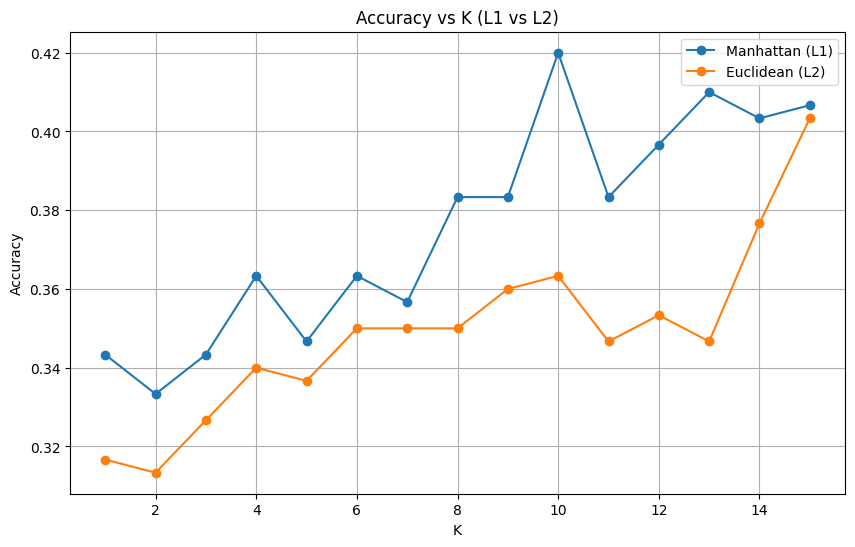

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc_l1, marker='o', label="Manhattan (L1)")
plt.plot(k_values, acc_l2, marker='o', label="Euclidean (L2)")

plt.title("Accuracy vs K (L1 vs L2)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
best_k_l1 = k_values[np.argmax(acc_l1)]
best_k_l2 = k_values[np.argmax(acc_l2)]

print("Best K for L1:", best_k_l1, "Accuracy:", max(acc_l1))
print("Best K for L2:", best_k_l2, "Accuracy:", max(acc_l2))


Best K for L1: 10 Accuracy: 0.42000000000000004
Best K for L2: 15 Accuracy: 0.4033333333333333


In [8]:
final_knn = KNeighborsClassifier(n_neighbors=best_k_l1, metric='manhattan')
final_knn.fit(X, y)

print("Final model trained using best K =", best_k_l1)


Final model trained using best K = 10



Top 5 Predictions:

Image 0: True = cat, Predicted = cat


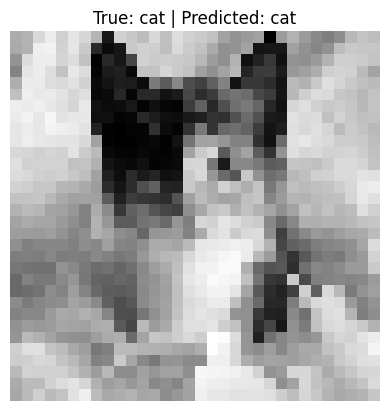

Image 1: True = cat, Predicted = dog


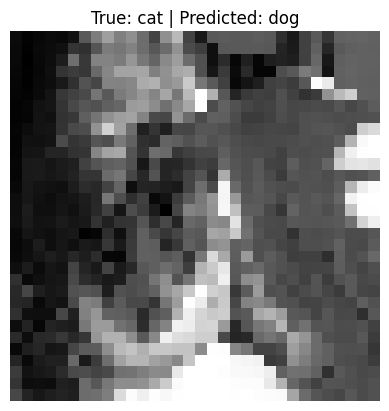

Image 2: True = cat, Predicted = cat


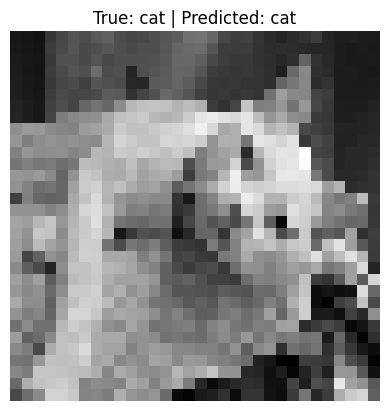

Image 3: True = cat, Predicted = cat


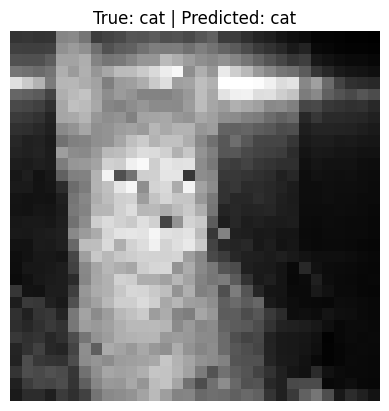

Image 4: True = cat, Predicted = dog


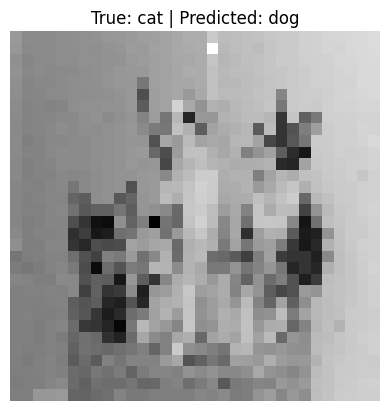

In [9]:
print("\nTop 5 Predictions:\n")

for i in range(5):
    img = X[i].reshape(32, 32)
    true_label = class_names[y[i]]
    pred_label = class_names[final_knn.predict([X[i]])[0]]

    print(f"Image {i}: True = {true_label}, Predicted = {pred_label}")

    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label} | Predicted: {pred_label}")
    plt.axis('off')
    plt.show()
